### Fetch the data

I' going to use the free API from [sunrisesunset.io](https://sunrisesunset.io/api/) to fetch the sunrise/sunset times for the current year. 

In [1]:
import requests as r

from dataclasses import dataclass
from datetime import datetime, date, timedelta

@dataclass 
class Location: 
    lat: float
    lon: float 

@dataclass
class DayDuration: 
    date: date
    duration: timedelta

    def as_hours(self):
        return self.duration.seconds / 60 / 60


Helsinki = Location(lat=60.192059, lon=24.945831)


/Users/sergeyhome/Projects/github/days-of-light/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
input_date_format = '%Y-%m-%d'
input_time_format = '%H:%M:%S'

def parse_api_date_object(obj): 
    parsed_date = datetime.strptime(obj['date'], input_date_format).date()
    day_length = datetime.strptime(obj['day_length'], input_time_format).time()
    day_duration = datetime.combine(date.min, day_length) - datetime.min
    return DayDuration(parsed_date, day_duration)


In [3]:
def get_year_bounds(ref_date): 
    start_of_year = date(ref_date.year, 1, 1)
    end_of_year = date(ref_date.year, 12, 31)
    return start_of_year, end_of_year

def get_request_url(location, date_start, date_end): 
    return "https://api.sunrisesunset.io/json?lat={}&lng={}&date_start={}&date_end={}".format(location.lat, location.lon, date_start, date_end)

def request_day_length_data(location): 
    date_start, date_end = get_year_bounds(datetime.now())
    response = r.get(get_request_url(location, date_start, date_end))
    assert response.status_code == 200, "Error code: " + str(response.status_code)

    json = response.json()
    assert json['status'] == 'OK'
    return [parse_api_date_object(obj) for obj in json['results']] 


### Plotting the day length data 

Let's make a plot to show us how the day length gets longer or shorter during the year 

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('ggplot')

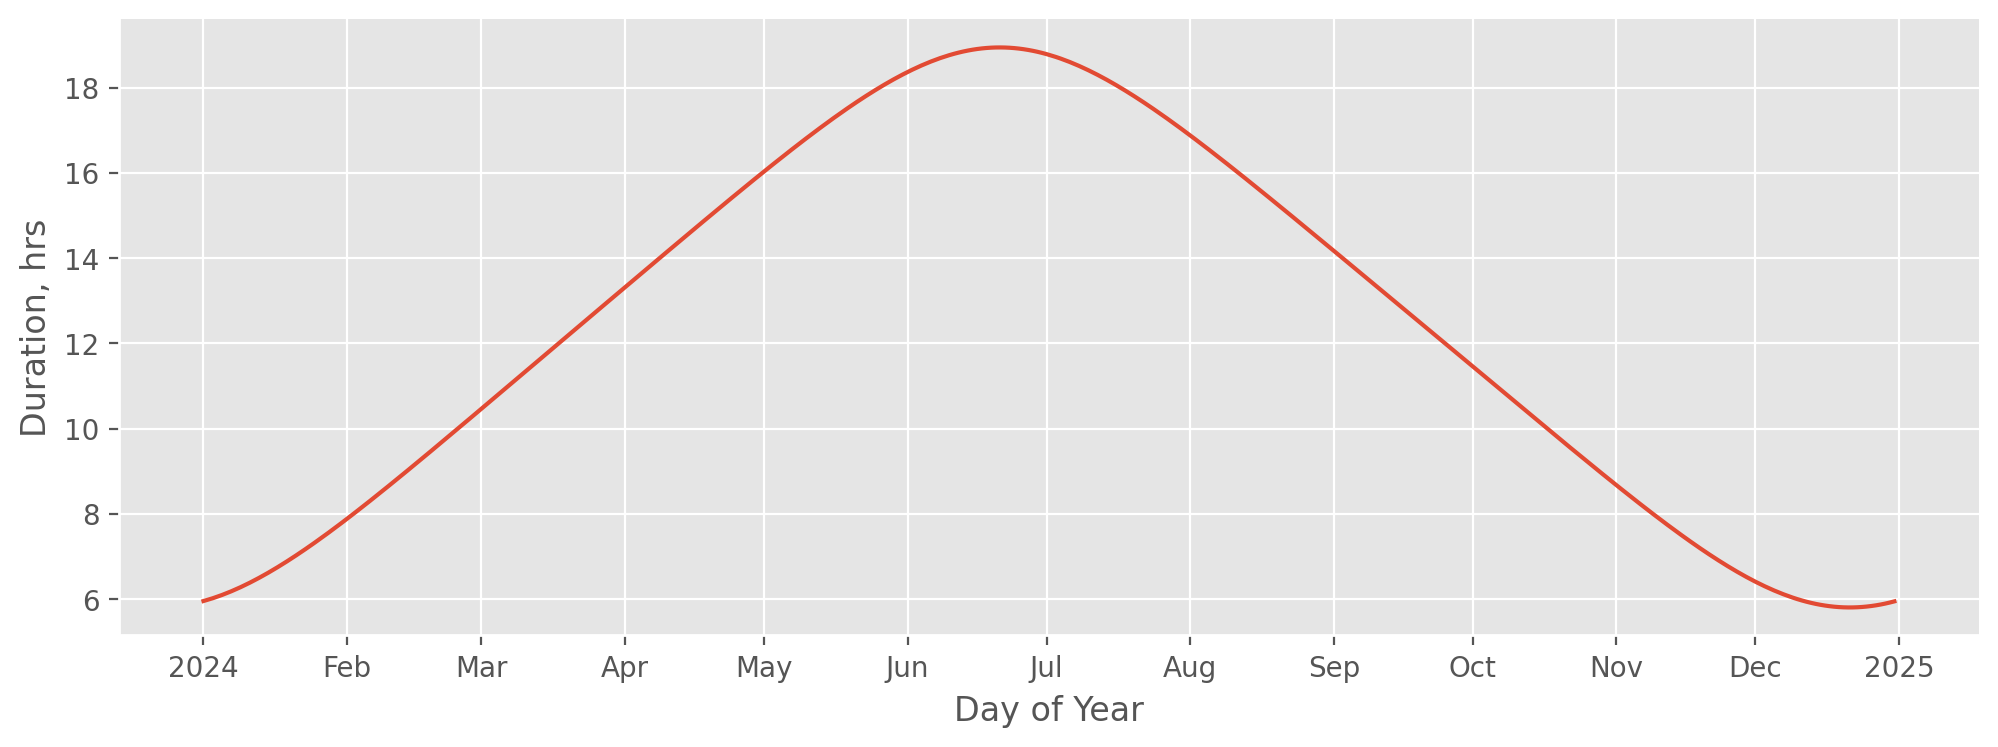

In [11]:
data = request_day_length_data(Helsinki)


xx = [d.date for d in data]
duration_yy = np.array([d.as_hours() for d in data])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(xx, duration_yy)
ax.set_ylabel('Duration, hrs')
ax.set_xlabel('Day of Year')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



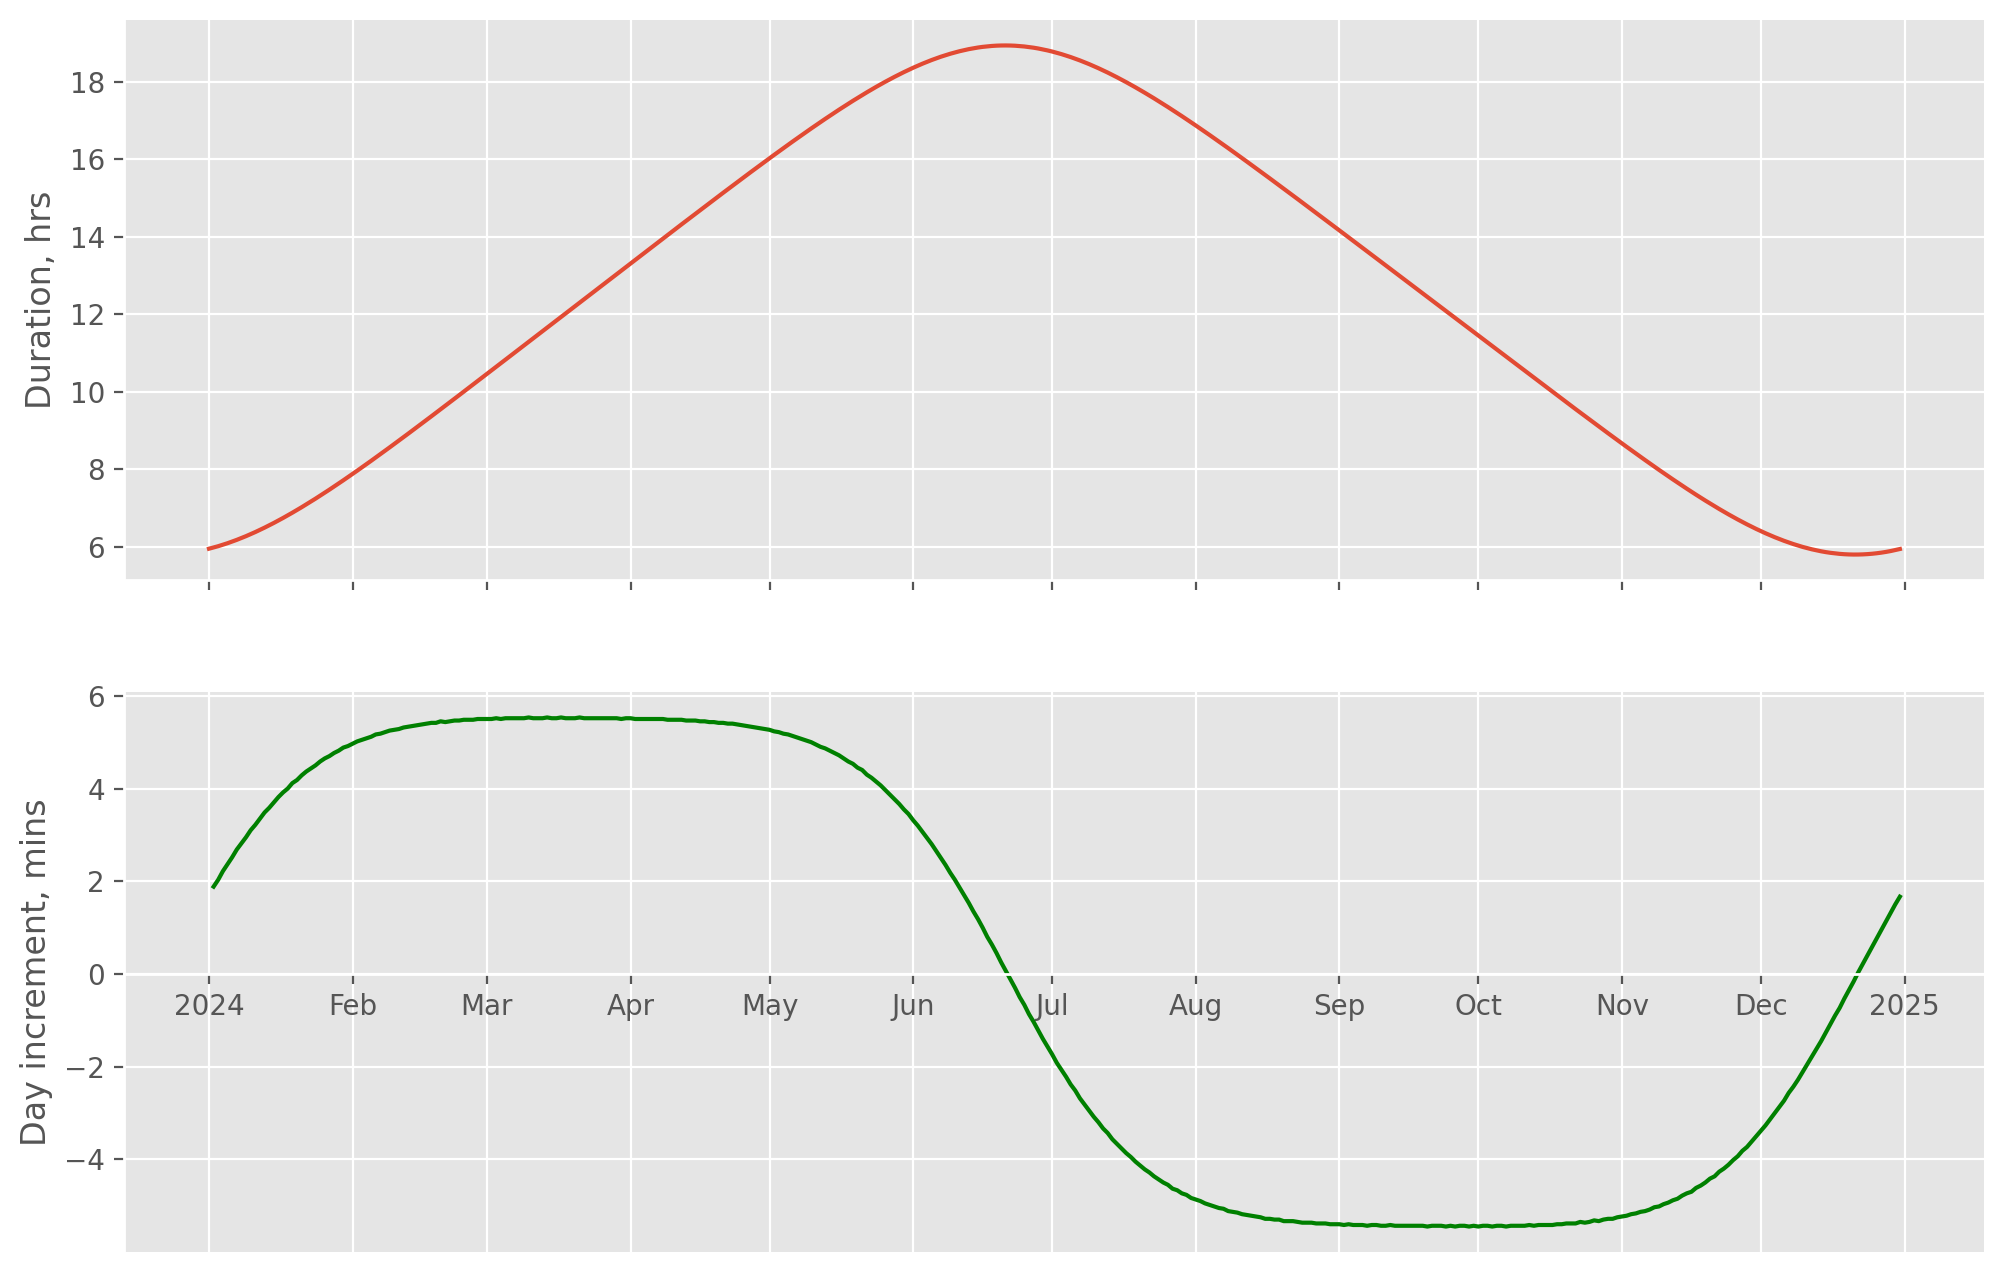

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('ggplot')

data = request_day_length_data(Helsinki)


xx = [d.date for d in data]
duration_yy = np.array([d.as_hours() for d in data])
duration_incr_yy = np.ediff1d(duration_yy) * 60

fig, (ax1, ax2) = plt.subplots(figsize=(12, 8), nrows=2, sharex=True)


ax1.plot(xx, duration_yy)
ax1.set_ylabel('Duration, hrs')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.plot(xx[1:], duration_incr_yy, color='green')

ax2.set_ylabel('Day increment, mins')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('zero')


In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']